In [1]:
import os

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec as gridspec
import dill

import suite2p as s2p

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities_ES as u

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice
sparse_mice = stx.ymaze_sess_deets.sparse_mice

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
sparse_sessions = stx.ymaze_sess_deets.SparseKO_sessions
from STX3KO_analyses.path_dicts.path_dict_esay import path_dictionary as path_dict
pkl_base_dir = path_dict['pkl_root']


In [3]:
sparse_sessions.keys()

dict_keys(['SparseKO_05', 'SparseKO_02', 'SparseKO_03'])

In [4]:
mouse = 'SparseKO_02'
d = sparse_sessions[mouse][0]
print(d)

{'date': '16_11_2024', 'scene': 'YMaze_LNovel', 'session': 4, 'scan': 14, 'novel_arm': -1, 'exp_day': 1}


In [5]:
date, scene, session, scan = d['date'], d['scene'], d['session'], d['scan']
print(scene)
# basedir = f'/mnt/BigDisk/2P_scratch/{mouse}/{date}/{scene}'
# basedir = f'C://Users/esay/data/Stx3/{mouse}/{date}/{scene}'
basedir = f'Z://giocomo/esay/Stx3/2pData/{mouse}/{date}/{scene}'

stem =  os.path.join(basedir, f'{scene}_{session:03}_{scan:03}')

d.update({'mouse': mouse ,
          'scan_file':stem + '.sbx',
          'scanheader_file': stem + '.mat',
          'vr_filename': os.path.join("Z://giocomo/esay/Stx3/VRData",mouse,date,"%s_%d.sqlite" %(scene,session)),
          'scan_number': scan,
          'prompt_for_keys': False,
          'VR_only': False,
          'scanner': "NLW",
          'n_channels':2,
             })

YMaze_LNovel


In [6]:
d

{'date': '16_11_2024',
 'scene': 'YMaze_LNovel',
 'session': 4,
 'scan': 14,
 'novel_arm': -1,
 'exp_day': 1,
 'mouse': 'SparseKO_02',
 'scan_file': 'Z://giocomo/esay/Stx3/2pData/SparseKO_02/16_11_2024/YMaze_LNovel\\YMaze_LNovel_004_014.sbx',
 'scanheader_file': 'Z://giocomo/esay/Stx3/2pData/SparseKO_02/16_11_2024/YMaze_LNovel\\YMaze_LNovel_004_014.mat',
 'vr_filename': 'Z://giocomo/esay/Stx3/VRData\\SparseKO_02\\16_11_2024\\YMaze_LNovel_4.sqlite',
 'scan_number': 14,
 'prompt_for_keys': False,
 'VR_only': False,
 'scanner': 'NLW',
 'n_channels': 2}

In [6]:
sess = stx.session.YMazeSession(**d)
sess.load_scan_info(sbx_version=3)
sess.align_VR_to_2P()
# sess.load_suite2p_data(which_ts=('F', 'Fneu','spks'))
# sess.get_trial_info()


Fixing teleports
frame rate 31.25
(180896,) ttl times,(77898,) ca2+ frame times
last time: VR 2492.7397499999997, ca2+ 2492.704
frame rate 31.25
(180896,) ttl times,(77898,) ca2+ frame times
last time: VR 2492.7397499999997, ca2+ 2492.704


In [18]:
sess.vr_data

time  trialnum          t        posx  posz        dz  lick  \
0         0.000      -1.0   0.000000    0.000000   0.0  0.000000   0.0   
1         0.032      -1.0   0.000000    0.000000   0.0  0.000000   0.0   
2         0.064      -1.0   0.000000    0.000000   0.0  0.000000   0.0   
3         0.096      -1.0   0.000000    0.000000   0.0  0.000000   0.0   
4         0.128      -1.0   0.000000    0.000000   0.0  0.000000   0.0   
...         ...       ...        ...         ...   ...       ...   ...   
77893  2492.576      65.0  42.053533  101.320027   0.0  0.053708   0.0   
77894  2492.608      65.0  42.123622  101.899621   0.0  0.041423   0.0   
77895  2492.640      65.0  42.198147  102.513875   0.0  0.028099   0.0   
77896  2492.672      66.0  11.211410    0.000000   0.0  0.014183   0.0   
77897  2492.704      66.0  11.211410    0.000000   0.0  0.000000   0.0   

       reward  tstart  teleport  scanning  manrewards   LR  cmd    pos  \
0         0.0     0.0       0.0      -1.0         0.0 -1.0 -1.0 -500.0   
1         0.0     0.0       0.0      -1.0         0.0 -1.0 -1.0 -500.0   
2         0.0     0.0       0.0      -1.0         0.0 -1.0 -1.0 -500.0   
3         0.0     0.0       0.0      -1.0         0.0 -1.0 -1.0 -500.0   
4         0.0     0.0       0.0      -1.0         0.0 -1.0 -1.0 -500.0   
...       ...     ...       ...       ...         ...  ...  ...    ...   
77893     0.0     0.0       0.0       1.0         0.0  1.0  2.0 -500.0   
77894     0.0     0.0       0.0       1.0         0.0  1.0  2.0 -500.0   
77895     0.0     0.0       0.0       1.0         0.0  1.0  2.0 -500.0   
77896     0.0     0.0       1.0       1.0         0.0  1.0  2.0 -500.0   
77897     0.0     0.0       0.0       1.0         0.0 -1.0  2.0 -500.0   

          speed  lick rate  
0      0.000000        0.0  
1      0.000000        0.0  
2      0.000000        0.0  
3      0.000000        0.0  
4      0.000000        0.0  
...         ...        ...  
77893  1.678375        0.0  
77894  1.294477        0.0  
77895  0.878079        0.0  
77896  0.443212        0.0  
77897  0.000000        0.0  

[77898 rows x 17 columns]

In [7]:
sess.load_suite2p_data(which_ts=('F', 'Fneu','spks'), mux = True) # mux = True just removes the error flag
sess.get_trial_info()

['Z://giocomo/esay/Stx3/2pData/SparseKO_02/16_11_2024/YMaze_LNovel\\YMaze_LNovel_004_014\\suite2p', 'Z://giocomo/esay/Stx3/2pData/SparseKO_02/16_11_2024/YMaze_LNovel\\YMaze_LNovel_004_014\\chan2/suite2p']


In [24]:
# modify timeseries for MUXED data (add Nan frames between values to align with lick/speed)

def align_mux(sess):
    for key in list (sess.timeseries.keys()):
        data=sess.timeseries[key]

        if f'channel_0' in key:
            new_data = np.empty((data.shape[0], data.shape[1] *2))
            new_data[:] = np.nan
            new_data[:,::2] = data # place chan0 values at even index

        elif f'channel_1' in key:
            new_data = np.empty((data.shape[0], data.shape[1] *2))
            new_data[:] = np.nan
            new_data[:,1::2] = data # place chan1 values at odd index

        else:
            continue 

        sess.timeseries[key] = new_data

def reverse_mux_alignment(self, df_key = "channel_0_F_dff"):
    data = self.timeseries[df_key]

    unmux = data[:, ~np.isnan(data).all(axis=0)]
    if unmux.shape[1] *2 != data.shape[1]:
        raise ValueError("Error in reversing mux, size mismatch")

    return unmux

In [9]:
align_mux(sess)

In [10]:
Fkey = "channel_0_F"
sess.timeseries['channel_0_F'].shape

(318, 77898)

In [11]:
chan0_mask = np.arange(sess.timeseries['channel_0_F'].shape[1]) % 2 ==0
chan1_mask = np.arange(sess.timeseries['channel_1_F'].shape[1]) % 2 ==1
chan0_mask, chan1_mask

(array([ True, False,  True, ..., False,  True, False]),
 array([False,  True, False, ...,  True, False,  True]))

In [12]:
sess.neuropil_corrected_dff_ES(Fkey = 'channel_0_F', 
                            Fneukey='channel_0_Fneu', 
                            tau=sess.s2p_ops['channel_0']['tau'],
                            chan_mask = chan0_mask,
                            spks_key='channel_0_spks')

413 10935
[  414   416   418 ... 10930 10932 10934]
13421 22237
[13422 13424 13426 ... 22232 22234 22236]
25889 33816
[25890 25892 25894 ... 33810 33812 33814]
35712 45308
[35712 35714 35716 ... 45302 45304 45306]
47238 57226
[47238 47240 47242 ... 57220 57222 57224]
59107 77896
[59108 59110 59112 ... 77890 77892 77894]


In [15]:
sess.timeseries['channel_0_F_dff'][:,413:10935]

array([[            nan,  9.11654121e-02,             nan, ...,
         1.95969846e-04,             nan, -8.71973671e-04],
       [            nan,  6.82876452e-02,             nan, ...,
         7.61910297e-01,             nan,  7.43864424e-01],
       [            nan,  4.33480722e-02,             nan, ...,
         2.64044666e-01,             nan,  2.68559400e-01],
       ...,
       [            nan,  1.37211331e-01,             nan, ...,
        -2.13414204e-02,             nan, -2.39808557e-02],
       [            nan,  1.13513329e-01,             nan, ...,
         4.04526919e-03,             nan, -2.42230108e-03],
       [            nan, -5.51499492e-02,             nan, ...,
         5.89629449e-02,             nan,  6.04108339e-02]])

In [16]:
sess.neuropil_corrected_dff_ES(Fkey = 'channel_0_F', 
                            Fneukey='channel_0_Fneu', 
                            tau=sess.s2p_ops['channel_0']['tau'],
                               chan_mask = chan0_mask,
                            spks_key='channel_0_spks')
sess.neuropil_corrected_dff_ES(Fkey = 'channel_1_F', 
                            Fneukey='channel_1_Fneu', 
                            tau=sess.s2p_ops['channel_1']['tau'],
                               chan_mask = chan1_mask,
                            spks_key='channel_1_spks')

sess.add_timeseries(licks=sess.vr_data['lick']._values)
sess.add_pos_binned_trial_matrix('licks')
sess.add_timeseries(speed=sess.vr_data['dz']._values)
sess.add_pos_binned_trial_matrix('speed')


413 10935
[  414   416   418 ... 10930 10932 10934]
13421 22237
[13422 13424 13426 ... 22232 22234 22236]
25889 33816
[25890 25892 25894 ... 33810 33812 33814]
35712 45308
[35712 35714 35716 ... 45302 45304 45306]
47238 57226
[47238 47240 47242 ... 57220 57222 57224]
59107 77896
[59108 59110 59112 ... 77890 77892 77894]
413 10935
[  413   415   417 ... 10929 10931 10933]
13421 22237
[13421 13423 13425 ... 22231 22233 22235]
25889 33816
[25889 25891 25893 ... 33811 33813 33815]
35712 45308
[35713 35715 35717 ... 45303 45305 45307]
47238 57226
[47239 47241 47243 ... 57221 57223 57225]
59107 77896
[59107 59109 59111 ... 77891 77893 77895]


In [161]:
# debugging neuropil_corrected_dff
Fkey = 'channel_0_F'
block = 3
Freg = np.zeros(sess.timeseries[Fkey].shape) * np.nan
dff = np.zeros(sess.timeseries[Fkey].shape) * np.nan
spks = np.zeros(sess.timeseries[Fkey].shape) * np.nan

start_ind = sess.trial_start_inds[sess.trial_info['block_number'] == block][0]
stop_ind = sess.trial_start_inds[sess.trial_info['block_number'] == block][-1]
start_ind, stop_ind

(35712, 44470)

In [163]:
chan0_mask = chan0_mask[start_ind: stop_ind]
chan0_mask.shape

(8758,)

In [164]:
curr_idx = np.arange(start_ind, stop_ind)
curr_idx = curr_idx[chan0_mask]
curr_idx

array([35712, 35714, 35716, ..., 44464, 44466, 44468], dtype=int64)

In [165]:
from suite2p.extraction import dcnv

# curr_idx = range(start_ind, stop_ind)
Fneukey='channel_0_Fneu'
tau=sess.s2p_ops['channel_0']['tau']
spks_key='channel_0_spks'
Fneu_coef=.7

Freg[:, curr_idx] = sess.timeseries[Fkey][:, curr_idx] - Fneu_coef * sess.timeseries[Fneukey][:, curr_idx] \
                                + Fneu_coef * np.nanmin(sess.timeseries[Fneukey][:, curr_idx], axis=1, keepdims=True)

Freg[:, curr_idx] = sp.ndimage.median_filter(Freg[:, curr_idx], size=(1, 7))
dff[:, curr_idx] = tpu.utilities.dff(Freg[:, curr_idx])
spks[:, curr_idx] = dcnv.oasis(dff[:, curr_idx], 2000, tau, sess.scan_info['frame_rate'])

In [160]:
dff[:, start_ind:stop_ind]

array([[        nan, -0.06327196,         nan, ...,  0.03730853,
                nan,  0.03842331],
       [        nan,  0.05592909,         nan, ...,  0.0746712 ,
                nan,  0.07515827],
       [        nan,  0.00021877,         nan, ...,  0.14192037,
                nan,  0.14000358],
       ...,
       [        nan,  0.09519918,         nan, ...,  0.00854116,
                nan, -0.00115293],
       [        nan,  0.06554023,         nan, ...,  0.00845206,
                nan,  0.00840929],
       [        nan,  0.14429974,         nan, ..., -0.04050186,
                nan, -0.03885837]])

In [166]:
sess.add_timeseries(dff=dff)

In [169]:
sess.timeseries['dff'][:,start_ind:stop_ind]

array([[ 4.08327985e-02,             nan,  3.70940618e-02, ...,
                    nan,  4.47199609e-02,             nan],
       [ 5.18747913e-02,             nan,  4.78838693e-02, ...,
                    nan,  2.61620283e+00,             nan],
       [-1.48751000e-03,             nan,  1.82703088e-03, ...,
                    nan,  5.94782095e-02,             nan],
       ...,
       [ 2.60272924e-01,             nan,  2.51916311e-01, ...,
                    nan, -3.86290563e-03,             nan],
       [ 3.23464761e-02,             nan,  2.93552728e-02, ...,
                    nan,  2.52300900e-03,             nan],
       [ 9.20511424e-02,             nan,  9.13203597e-02, ...,
                    nan,  2.54317079e-02,             nan]])

c:\users\esay\repos\twoputils\TwoPUtils\spatial_analyses.py:73: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


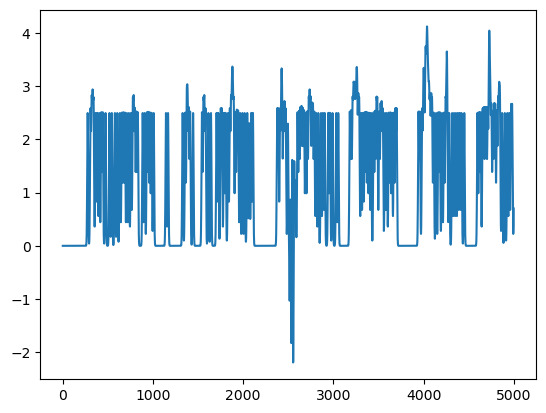

In [17]:
# sess.neuropil_corrected_dff(Fkey = 'channel_0_F', 
#                             Fneukey='channel_0_Fneu', 
#                             tau=sess.s2p_ops['channel_0']['tau'],
#                             spks_key='channel_0_spks')
# sess.neuropil_corrected_dff(Fkey = 'channel_1_F', 
#                             Fneukey='channel_1_Fneu', 
#                             tau=sess.s2p_ops['channel_1']['tau'],
#                             spks_key='channel_1_spks')

sess.add_timeseries(licks=sess.vr_data['lick']._values)
sess.add_pos_binned_trial_matrix('licks')
speed = sess.vr_data['dz']._values*sess.scan_info['frame_rate']
sess.add_timeseries(speed=speed)
sess.add_pos_binned_trial_matrix('speed')

fig,ax = plt.subplots()
ax.plot(speed[:5000])


spks = np.copy(sess.timeseries['channel_0_F_dff'])
sess.add_timeseries(channel_0_F_dff_speed_filt=spks)
spks[:,speed<2]=np.nan
sess.add_pos_binned_trial_matrix('channel_0_F_dff_speed_filt')


spks = np.copy(sess.timeseries['channel_1_F_dff'])
spks[:,speed<2]=np.nan
sess.add_timeseries(channel_1_F_dff_speed_filt=spks)
sess.add_pos_binned_trial_matrix('channel_1_F_dff_speed_filt')


In [ ]:
# pop place cell calculation NOT WORKING
da.spatial.calc_place_cells(sess,ts_key = 'spks',speed_thr = 2, shuffle_method ='population')

In [18]:
sess.trial_matrices.keys()

dict_keys(['channel_0_F_dff', 'bin_edges', 'bin_centers', 'channel_0_spks', 'channel_1_F_dff', 'channel_1_spks', 'licks', 'speed', 'channel_0_F_dff_speed_filt', 'channel_1_F_dff_speed_filt'])

In [19]:
sess.timeseries.keys()

dict_keys(['channel_0_F', 'channel_0_Fneu', 'channel_0_spks', 'channel_1_F', 'channel_1_Fneu', 'channel_1_spks', 'channel_0_F_dff', 'channel_1_F_dff', 'licks', 'speed', 'channel_0_F_dff_speed_filt', 'channel_1_F_dff_speed_filt'])

In [20]:
sess.place_cells_calc(Fkey='channel_0_F_dff', out_key='channel_0_F_dff', nperms=100)
sess.place_cells_calc(Fkey='channel_1_F_dff', out_key='channel_1_F_dff', nperms=100)

perm 0
perm 0
perm 0
perm 0


### ella's sess df notes
- trial_info: block_number, LR
- place_cell_info: 

In [124]:
sess.timeseries['channel_0_F_dff']

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [14]:
sess = u.load_single_day(sparse_mice[1],0,pkl_base_dir)


{'date': '16_11_2024', 'scene': 'YMaze_LNovel', 'session': 4, 'scan': 14, 'novel_arm': -1, 'exp_day': 1, 'mouse': 'SparseKO_02', 'scan_file': 'Z://giocomo/esay/Stx3/2pData/SparseKO_02/16_11_2024/YMaze_LNovel\\YMaze_LNovel_004_014.sbx', 'scanheader_file': 'Z://giocomo/esay/Stx3/2pData/SparseKO_02/16_11_2024/YMaze_LNovel\\YMaze_LNovel_004_014.mat', 'vr_filename': 'Z://giocomo/esay/Stx3/VRData\\SparseKO_02\\16_11_2024\\YMaze_LNovel_4.sqlite', 'scan_number': 14, 'prompt_for_keys': False, 'VR_only': False, 'scanner': 'NLW', 'n_channels': 2}


In [21]:
output_path = os.path.join("C://Users/esay/data/Stx3/YMazeSessPkls/")
tpu.sess.save_session(sess,output_path)

In [30]:
df = sess.timeseries['channel_0_F_dff']

unmux = df[:, ~np.isnan(df).all(axis=0)]

sess.timeseries['channel_0_F_dff'] = unmux

In [34]:
# create mask for place cells only 

chan0_mask_pf_left = sess.place_cell_info['channel_0_F_dff']['left']['masks']
chan0_mask_pf_right = sess.place_cell_info['channel_0_F_dff']['right']['masks']
chan1_mask_pf_left = sess.place_cell_info['channel_1_F_dff']['left']['masks']
chan1_mask_pf_right = sess.place_cell_info['channel_1_F_dff']['right']['masks']

chan1_mask = chan1_mask_pf_left | chan1_mask_pf_right
chan0_mask = chan0_mask_pf_left | chan0_mask_pf_right

In [35]:
# mask for interneurons
int_mask1 = u.is_putative_interneuron(sess, ts_key='channel_1_F_dff', method='speed',
                            prct=10, r_thresh=0.3)

int_mask0 = u.is_putative_interneuron(sess, ts_key='channel_0_F_dff', method='speed',
                            prct=10, r_thresh=0.3)

# chan1_mask = np.logical_and(chan1_mask, int_mask1)
# chan0_mask = np.logical_and(chan0_mask, int_mask0)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 77898 but corresponding boolean dimension is 32818

In [17]:
chan1_mask = np.logical_and(chan1_mask, int_mask1)
chan0_mask = np.logical_and(chan0_mask, int_mask0)

In [28]:
# load 
pkldir = os.path.join('C://Users/esay/data/Stx3/YMazeSessPkls/', mouse,  date, f'{scene}_{session}.pkl')
sess = stx.session.YMazeSession.from_file(pkldir, verbose=False)

In [31]:
def plot_cells(trial_mat, cell_inds=None, n_cols=20):
    '''

    :param ca1:
    :param cell_inds: indices of cells to plot
    :param save_figs:
    :return:
    '''

    if cell_inds is None:
        cell_inds = np.arange(trial_mat.shape[-1])

    n_rows = int(np.ceil(cell_inds.shape[0] / n_cols))
    fig = plt.figure(figsize=[30, 3 * n_rows])
    gs = gridspec(n_rows, n_cols)
    '''
    ES changes: 
    - indexing for pc only indexing error
    '''
    
    # for cell in cell_inds:
    for i, cell in enumerate(cell_inds):
        # col = cell % n_cols
        col = i % n_cols
        # row = int(cell / n_cols)
        row = i //n_cols
        ax = fig.add_subplot(gs[row, col])
        h = ax.imshow(trial_mat[:, :, cell], cmap="magma")

        if col == 0:
            ax.set_xlabel('pos')
            ax.set_ylabel('trial #')
            if row==0:
                plt.colorbar(h,ax=ax)
        else:
            ax.set_xticks([])
            ax.set_yticks([])
    fig.subplots_adjust(hspace=.3)
    return fig

In [33]:
sess.trial_info['LR']

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
        1.])

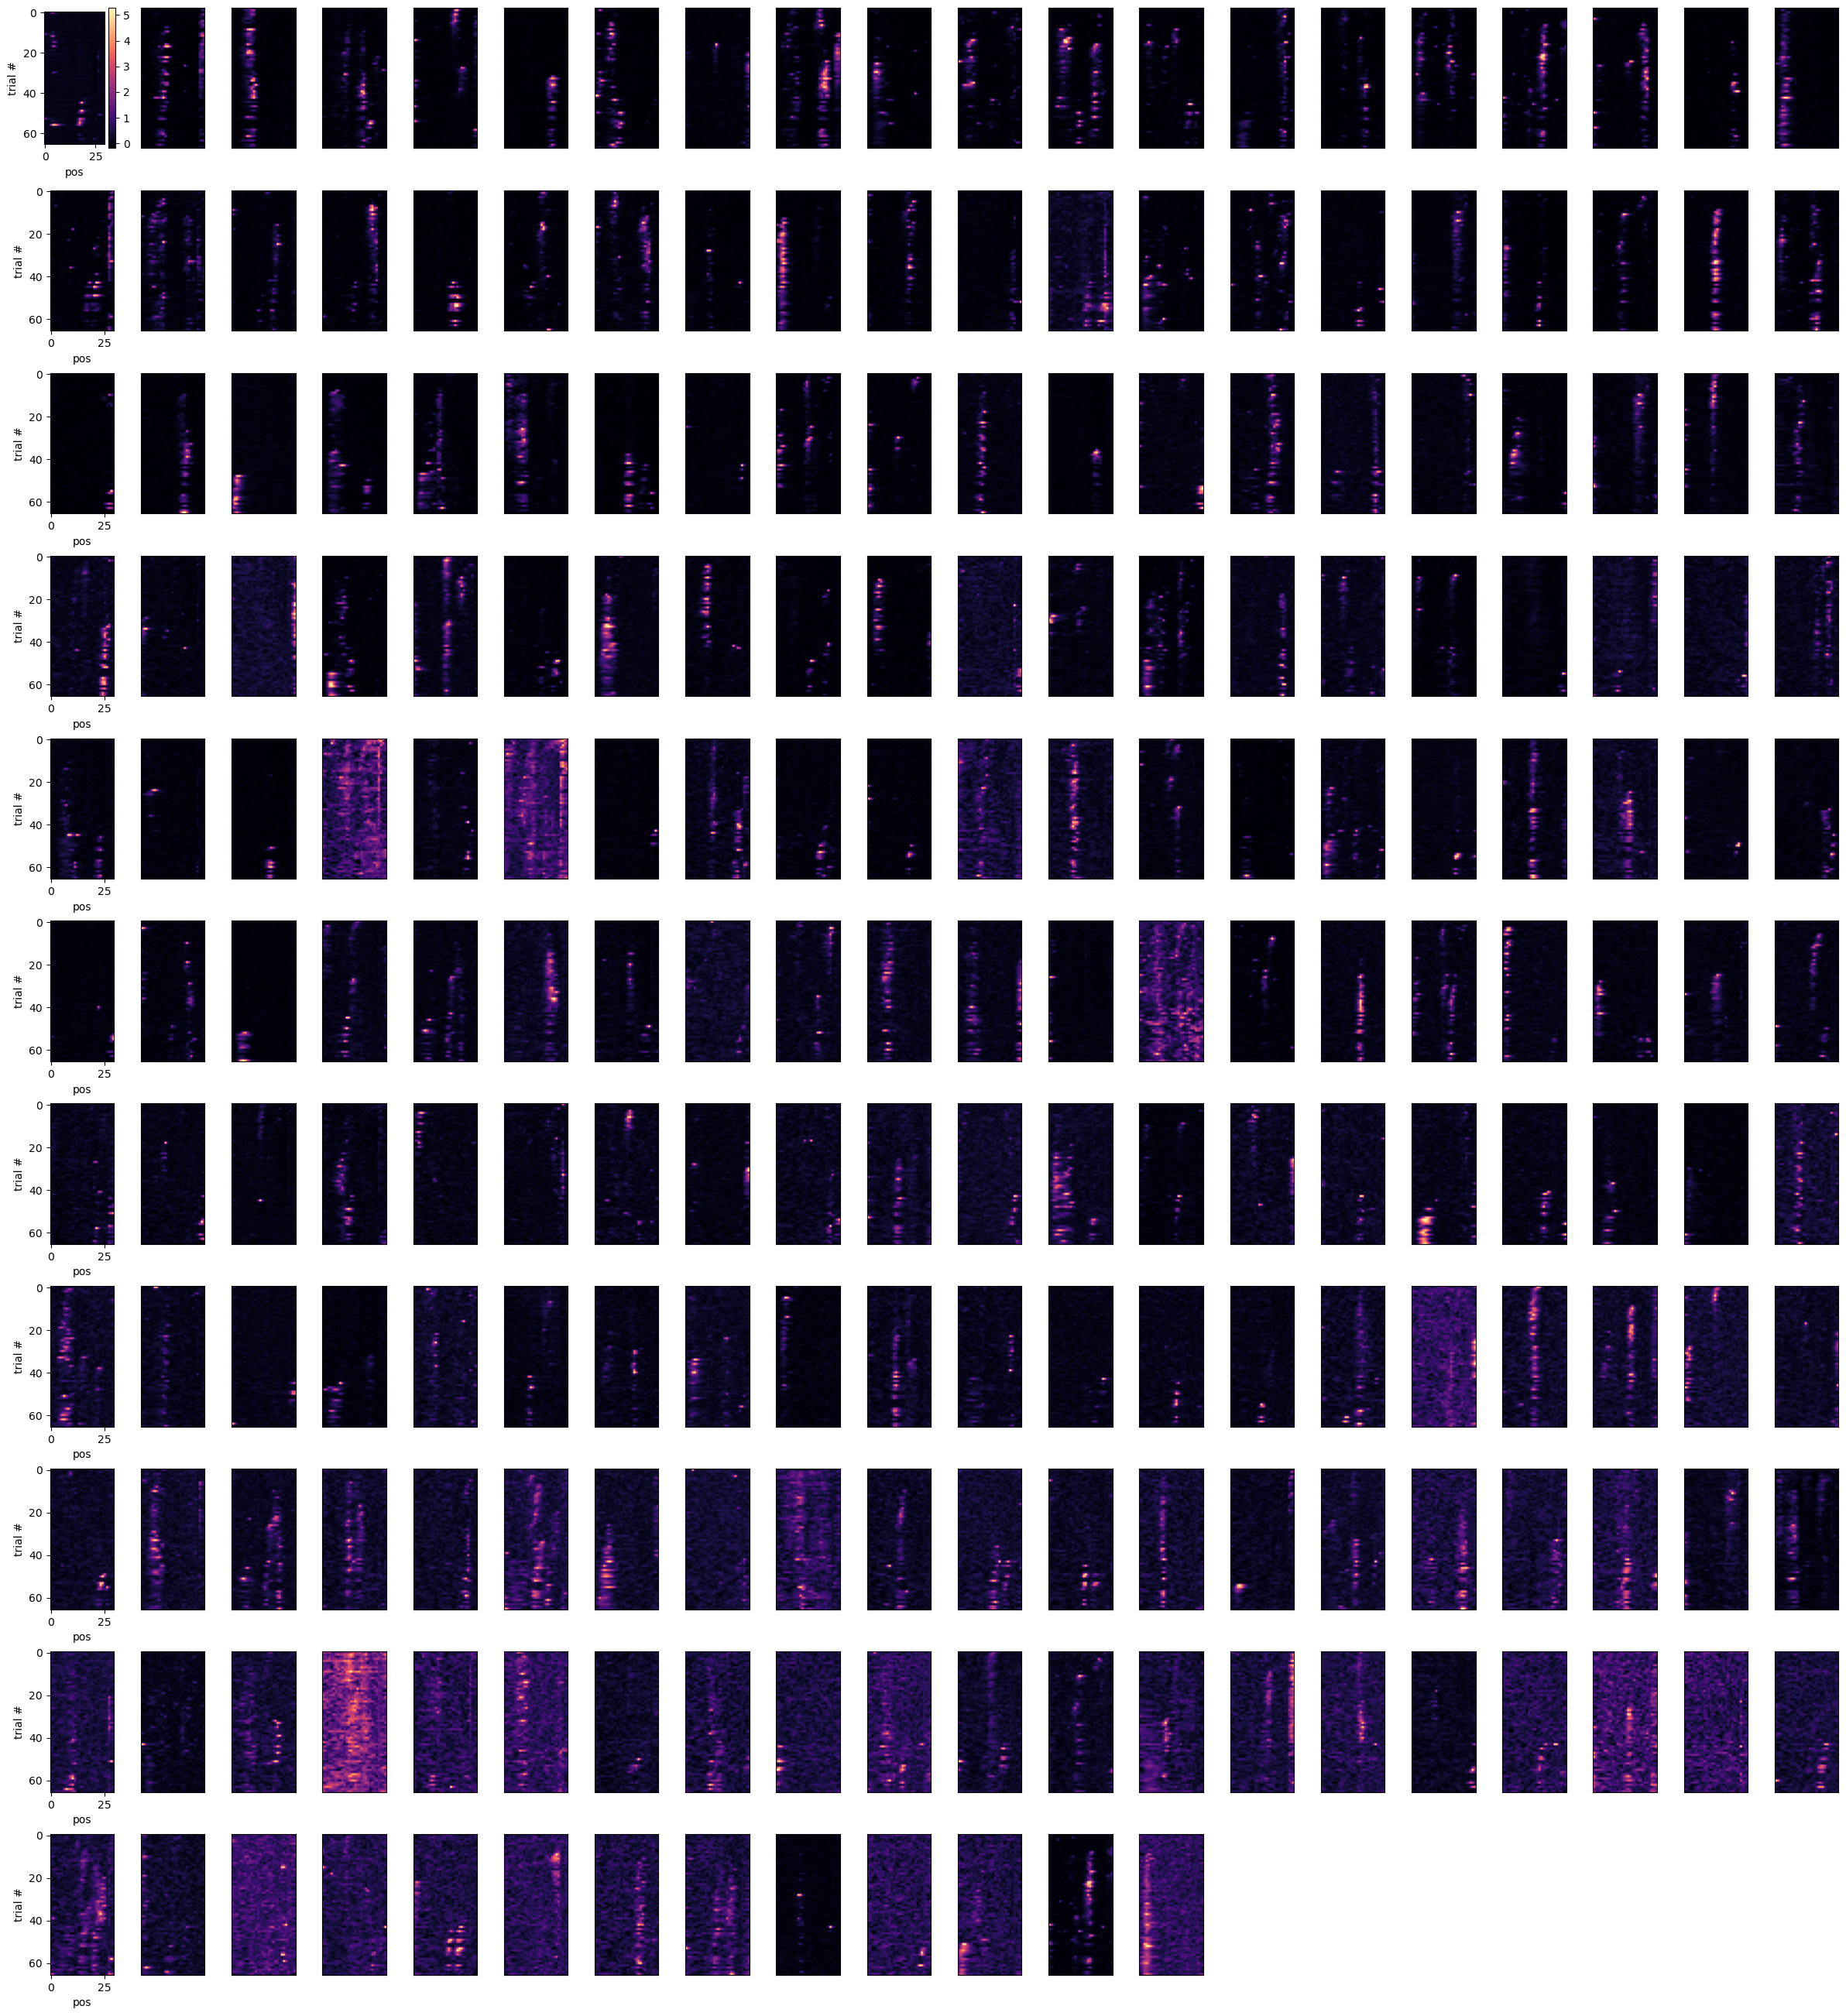

In [36]:
# trial_mask = (sess.trial_info['LR']==sess.novel_arm)*((sess.trial_info['block_number']%2)==1)
tmat = sess.trial_matrices['channel_0_F_dff']
n_cells = tmat.shape[-1]

# plot only place cells using place cell mask
pc_idx = np.where(chan0_mask[:n_cells])[0]
fig = plot_cells(tmat, cell_inds=pc_idx)

# # uncomment to plot all cells
# fig = plot_cells(tmat[trial_mask,:,:], cell_inds=np.array([r for r in range(n_cells)]))

In [20]:
trial_mask = (sess.trial_info['LR']==sess.novel_arm)*((sess.trial_info['block_number']%2)==0)
tmat = sess.trial_matrices['channel_1_F_dff']
n_cells = tmat.shape[-1]


#place cells only
pc_idx = np.where(chan1_mask[:n_cells])[0]
fig = plot_cells(tmat[trial_mask,:,:], cell_inds=pc_idx)

# # all cells
# fig = plot_cells(tmat[trial_mask,:,:], cell_inds=np.array([r for r in range(n_cells)]))

ValueError: Number of rows must be a positive integer, not 0

<Figure size 3000x0 with 0 Axes>

In [82]:
# for mouse in sparse_mice:
mouse = "SparseKO_02"
day = sparse_sessions[mouse][0:-1]
for d in day: 
    print(d)
    date, scene, session, scan = d['date'], d['scene'], d['session'], d['scan']
    print(scene)
    # basedir = f'C://Users/esay/data/Stx3/{mouse}/{date}/{scene}'
    stemdir = f'Z://giocomo/esay/Stx3/2pData/{mouse}/{date}/{scene}'
    stem = os.path.join(stemdir, f'{scene}_{session:03}_{scan:03}')
    root = os.path.join(stemdir, f'{scene}_{session:03}_{scan:03}')
    d.update({
        'mouse': mouse,
        'scan_file': root + '.sbx',
        'scanheader_file': root + '.mat',
        'vr_filename': os.path.join("Z://giocomo/esay/Stx3/VRData", mouse, date, "%s_%d.sqlite" % (scene, session)),
        'scan_number': scan,
        'prompt_for_keys': False,
        'VR_only': False,
        'scanner': "NLW",
        'n_channels': 2,
    })

    
    sess = stx.session.YMazeSession(**d)
    sess.load_scan_info(sbx_version=3)
    sess.align_VR_to_2P()
    sess.load_suite2p_data(which_ts=('F', 'Fneu'))
    sess.get_trial_info()

    
    F = sess.timeseries['channel_0_F']
    trial_ts = np.zeros([F.shape[-1], ]) - 1
    blocknum_ts = np.zeros([F.shape[-1], ]) - 1
    for t, (start, stop) in enumerate(zip(sess.trial_start_inds, sess.teleport_inds)):
        trial_ts[start:stop] = t
        blocknum_ts[start:stop] = sess.trial_info['block_number'][t]
    mask_920 = (blocknum_ts % 2 == 0) * (blocknum_ts > 0)
    mask_1040 = (blocknum_ts % 2 == 1) * (blocknum_ts > 0)

    
    sig920 = sess.timeseries['channel_0_F'][:, mask_920].sum(axis=-1)
    sig1040 = sess.timeseries['channel_0_F'][:, mask_1040].sum(axis=-1)
    channel_0_mask = sig920 > sig1040

    
    sess.timeseries['channel_0_F'] = sess.timeseries['channel_0_F'][channel_0_mask, :]
    sess.timeseries['channel_0_Fneu'] = sess.timeseries['channel_0_Fneu'][channel_0_mask, :]
    sig920 = sess.timeseries['channel_1_F'][:, mask_920].sum(axis=-1)
    sig1040 = sess.timeseries['channel_1_F'][:, mask_1040].sum(axis=-1)
    channel_1_mask = sig1040 > sig920

    
    sess.timeseries['channel_1_F'] = sess.timeseries['channel_1_F'][channel_1_mask, :]
    sess.timeseries['channel_1_Fneu'] = sess.timeseries['channel_1_Fneu'][channel_1_mask, :]
    sess.neuropil_corrected_dff(Fkey='channel_0_F', Fneukey='channel_0_Fneu', tau=sess.s2p_ops['channel_0']['tau'], spks_key='channel_0_spks')
    sess.neuropil_corrected_dff(Fkey='channel_1_F', Fneukey='channel_1_Fneu', tau=sess.s2p_ops['channel_1']['tau'], spks_key='channel_1_spks')

    
    sess.add_timeseries(licks=sess.vr_data['lick']._values)
    sess.add_pos_binned_trial_matrix('licks')
    speed = sess.vr_data['dz']._values * sess.scan_info['frame_rate']
    sess.add_timeseries(speed=speed)
    sess.add_pos_binned_trial_matrix('speed')
    
    
    spks = np.copy(sess.timeseries['channel_0_F_dff'])
    spks[:, speed < 2] = np.nan
    sess.add_timeseries(channel_0_F_dff_speed_filt=spks)
    sess.add_pos_binned_trial_matrix('channel_0_F_dff_speed_filt')
    spks = np.copy(sess.timeseries['channel_1_F_dff'])
    spks[:, speed < 2] = np.nan
    
    sess.add_timeseries(channel_1_F_dff_speed_filt=spks)
    sess.add_pos_binned_trial_matrix('channel_1_F_dff_speed_filt')
    
    mask_920 = sess.trial_info['block_number'] % 2 == 0
    sess.place_cells_calc(Fkey='channel_0_spks', out_key='channel_0_spks', nperms=100, trial_mask=mask_920)
    mask_1040 = sess.trial_info['block_number'] % 2 == 1
    sess.place_cells_calc(Fkey='channel_1_spks', out_key='channel_1_spks', nperms=100, trial_mask=mask_1040)
    tpu.sess.save_session(sess, 'C:/Users/esay/data/Stx3/YMazeSessPkls/v2')

{'date': '16_11_2024', 'scene': 'YMaze_LNovel', 'session': 4, 'scan': 14, 'novel_arm': -1, 'exp_day': 1}
YMaze_LNovel
Fixing teleports
frame rate 31.25
(180896,) ttl times,(77898,) ca2+ frame times
last time: VR 2492.7397499999997, ca2+ 2492.704
['Z://giocomo/esay/Stx3/2pData/SparseKO_02/16_11_2024/YMaze_LNovel\\YMaze_LNovel_004_014\\suite2p', 'Z://giocomo/esay/Stx3/2pData/SparseKO_02/16_11_2024/YMaze_LNovel\\YMaze_LNovel_004_014\\chan2/suite2p']


AssertionError: channel_0_F must be the same length as vr_data, channel_0_F 38949, vr 77898 

In [ ]:
 day = sparse_sessions[mouse][0:-1]
    for d in day: 
        print(d)
        date, scene, session, scan = d['date'], d['scene'], d['session'], d['scan']
        print(scene)
        # basedir = f'C://Users/esay/data/Stx3/{mouse}/{date}/{scene}'
        stemdir = f'Z://giocomo/esay/Stx3/2pData/{mouse}/{date}/{scene}'
        stem = os.path.join(stemdir, f'{scene}_{session:03}_{scan:03}')
        root = os.path.join(stemdir, f'{scene}_{session:03}_{scan:03}')
        d.update({
            'mouse': mouse,
            'scan_file': root + '.sbx',
            'scanheader_file': root + '.mat',
            'vr_filename': os.path.join("Z://giocomo/esay/Stx3/VRData", mouse, date, "%s_%d.sqlite" % (scene, session)),
            'scan_number': scan,
            'prompt_for_keys': False,
            'VR_only': False,
            'scanner': "NLW",
            'n_channels': 2,
        })

        
        sess = stx.session.YMazeSession(**d)
        sess.load_scan_info(sbx_version=3)
        sess.align_VR_to_2P()
        sess.load_suite2p_data(which_ts=('F', 'Fneu'))
        sess.get_trial_info()

        
        F = sess.timeseries['channel_0_F']
        trial_ts = np.zeros([F.shape[-1], ]) - 1
        blocknum_ts = np.zeros([F.shape[-1], ]) - 1
        for t, (start, stop) in enumerate(zip(sess.trial_start_inds, sess.teleport_inds)):
            trial_ts[start:stop] = t
            blocknum_ts[start:stop] = sess.trial_info['block_number'][t]
        mask_920 = (blocknum_ts % 2 == 0) * (blocknum_ts > 0)
        mask_1040 = (blocknum_ts % 2 == 1) * (blocknum_ts > 0)

        
        sig920 = sess.timeseries['channel_0_F'][:, mask_920].sum(axis=-1)
        sig1040 = sess.timeseries['channel_0_F'][:, mask_1040].sum(axis=-1)
        channel_0_mask = sig920 > sig1040

        
        sess.timeseries['channel_0_F'] = sess.timeseries['channel_0_F'][channel_0_mask, :]
        sess.timeseries['channel_0_Fneu'] = sess.timeseries['channel_0_Fneu'][channel_0_mask, :]
        sig920 = sess.timeseries['channel_1_F'][:, mask_920].sum(axis=-1)
        sig1040 = sess.timeseries['channel_1_F'][:, mask_1040].sum(axis=-1)
        channel_1_mask = sig1040 > sig920

        
        sess.timeseries['channel_1_F'] = sess.timeseries['channel_1_F'][channel_1_mask, :]
        sess.timeseries['channel_1_Fneu'] = sess.timeseries['channel_1_Fneu'][channel_1_mask, :]
        sess.neuropil_corrected_dff(Fkey='channel_0_F', Fneukey='channel_0_Fneu', tau=sess.s2p_ops['channel_0']['tau'], spks_key='channel_0_spks')
        sess.neuropil_corrected_dff(Fkey='channel_1_F', Fneukey='channel_1_Fneu', tau=sess.s2p_ops['channel_1']['tau'], spks_key='channel_1_spks')

        
        sess.add_timeseries(licks=sess.vr_data['lick']._values)
        sess.add_pos_binned_trial_matrix('licks')
        speed = sess.vr_data['dz']._values * sess.scan_info['frame_rate']
        sess.add_timeseries(speed=speed)
        sess.add_pos_binned_trial_matrix('speed')
        
        
        spks = np.copy(sess.timeseries['channel_0_F_dff'])
        spks[:, speed < 2] = np.nan
        sess.add_timeseries(channel_0_F_dff_speed_filt=spks)
        sess.add_pos_binned_trial_matrix('channel_0_F_dff_speed_filt')
        spks = np.copy(sess.timeseries['channel_1_F_dff'])
        spks[:, speed < 2] = np.nan
        
        sess.add_timeseries(channel_1_F_dff_speed_filt=spks)
        sess.add_pos_binned_trial_matrix('channel_1_F_dff_speed_filt')
        
        mask_920 = sess.trial_info['block_number'] % 2 == 0
        sess.place_cells_calc(Fkey='channel_0_spks', out_key='channel_0_spks', nperms=100, trial_mask=mask_920)
        mask_1040 = sess.trial_info['block_number'] % 2 == 1
        sess.place_cells_calc(Fkey='channel_1_spks', out_key='channel_1_spks', nperms=100, trial_mask=mask_1040)
        tpu.sess.save_session(sess, 'C:/Users/esay/data/Stx3/YMazeSessPkls/v2')